# Upload Dataset

In [1]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=10, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


# Data analysis
Try to understand duplicates, range of values, functional dependencies

In [2]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520 -0.296532  0.869868   
2 -0.510782 -0.234955  1.076270  0.670360  0.188123  1.359878  0.442312   
3 -0.904833  0.957409  1.689667 -0.700398  0.095618 -0.184501 -0.800839   
4 -0.230787 -0.355325 -1.067421  1.033823 -0.723273 -0.416435 -1.032871   

          7         8         9  
0  0.724020 -1.314765 -0.475478  
1  0.196561  0.281992 -0.401782  
2  0.190787  1.110523  0.219885  
3 -0.714054  0.557694 -1.467285  
4  0.578732 -0.200667 -0.426281  


In [3]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

### Single column analysis

In [4]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [5]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0    0.005780
1   -0.031556
2   -0.016019
3    0.036449
4   -0.023135
5   -0.001820
6   -0.026303
7    0.007726
8    0.018629
9    0.092134
dtype: float64
Standard deviation values:
0    0.991113
1    0.975035
2    0.982018
3    1.023308
4    0.966829
5    1.022371
6    0.987888
7    0.972030
8    1.026852
9    1.001554
dtype: float64


Create a function that changes at random the feature type with boolean or numeric values

In [6]:
import random

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']

# Randomly select 10 elements from the names list
random_names = random.sample(names, 10)

# Randomly select 10 elements from the surnames list
random_surnames = random.sample(surnames, 10)

print(random_names)
print(random_surnames)

['Ivy', 'Grace', 'Alice', 'Charlie', 'Eve', 'Henry', 'Jack', 'David', 'Frank', 'Bob']
['Moore', 'Williams', 'Miller', 'Johnson', 'Smith', 'Davis', 'Brown', 'Jones', 'Taylor', 'Wilson']


In [7]:
import pandas as pd
import numpy as np

def inject_variable_type_issue(dataset, percentage):
    # Copy the dataset to avoid modifying the original
    polluted_dataset = dataset.copy()

    # Determine the number of features to be affected
    num_features_affected = int(len(dataset.columns) * percentage)

    # Generate random indices to select features to be affected
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.25:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue'], size=len(dataset))
            elif prob < 0.5:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob<0.75:
                polluted_dataset[column_name] = np.random.choice(random_names, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(random_surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = inject_variable_type_issue(df, 0.5)
print(polluted_dataset.head())

         0         1         2         3       4      5         6        7  \
0      Eve  1.162717 -0.533602 -0.628703   Davis    red  0.344324      Eve   
1  Charlie -0.220116 -0.869748  1.966181   Brown   blue  0.869868    Alice   
2    Alice -0.234955  1.076270  0.670360  Wilson  green  0.442312    Grace   
3    Frank  0.957409  1.689667 -0.700398   Smith    red -0.800839    David   
4      Bob -0.355325 -1.067421  1.033823  Miller    red -1.032871  Charlie   

         8         9  
0    Alice -0.475478  
1    David -0.401782  
2    Henry  0.219885  
3    Henry -1.467285  
4  Charlie -0.426281  


## Statistics of the polluted dataset

In [8]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset[idx].value_counts())
    distinct_values = (polluted_dataset[idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset[idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset[idx].min())
    print ('max:', polluted_dataset[idx].max())
    print ('mode:', polluted_dataset[idx].mode()[0])

0
Bob        117
Charlie    114
Alice      106
David      101
Henry       99
Grace       98
Jack        97
Frank       92
Ivy         90
Eve         86
Name: count, dtype: int64
10
0
Bob        117
Charlie    114
Alice      106
David      101
Henry       99
Grace       98
Jack        97
Frank       92
Ivy         90
Eve         86
Name: count, dtype: int64
Uniqueness:  0.01
min: Alice
max: Jack
mode: Bob
1
 1.162717    1
-2.800894    1
 0.683642    1
-0.797515    1
 0.175395    1
            ..
 0.987638    1
-2.073400    1
 0.766043    1
 0.861198    1
 0.180831    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.702650734489273
max: 3.4570878539816565
mode: -3.702650734489273
2
-0.533602    1
-0.538819    1
 1.058653    1
-0.739618    1
-0.368290    1
            ..
 0.305582    1
 0.650682    1
-0.483982    1
-0.375815    1
-0.832630    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness

In [9]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

0
Bob        117
Charlie    114
Alice      106
David      101
Henry       99
Grace       98
Jack        97
Frank       92
Ivy         90
Eve         86
Name: count, dtype: int64


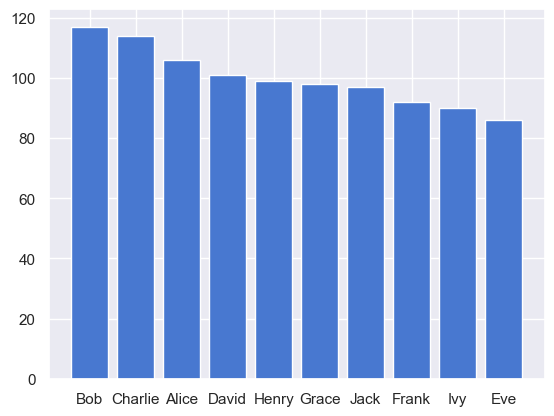

4
Johnson     112
Williams    110
Wilson      106
Brown       103
Smith       101
Taylor       99
Davis        96
Miller       94
Jones        93
Moore        86
Name: count, dtype: int64


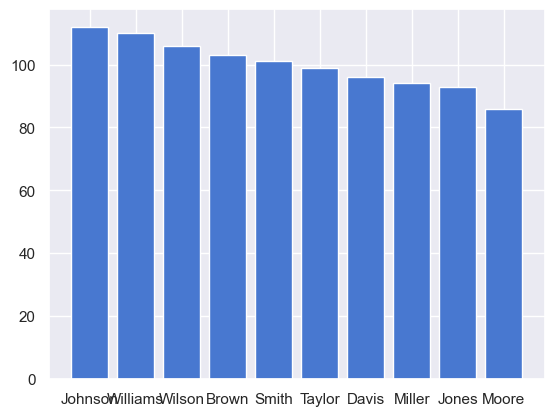

5
blue     359
red      334
green    307
Name: count, dtype: int64


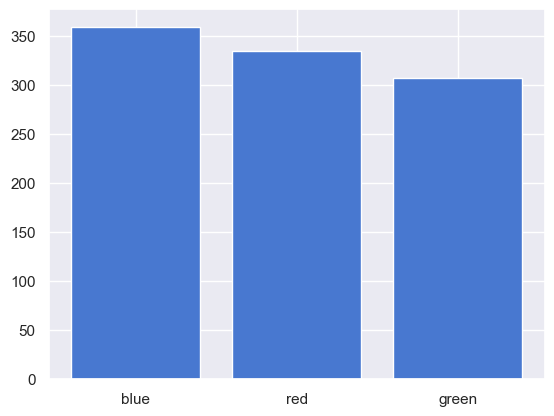

7
Frank      112
Henry      111
Ivy        109
David      107
Charlie     98
Bob         98
Alice       97
Eve         96
Jack        87
Grace       85
Name: count, dtype: int64


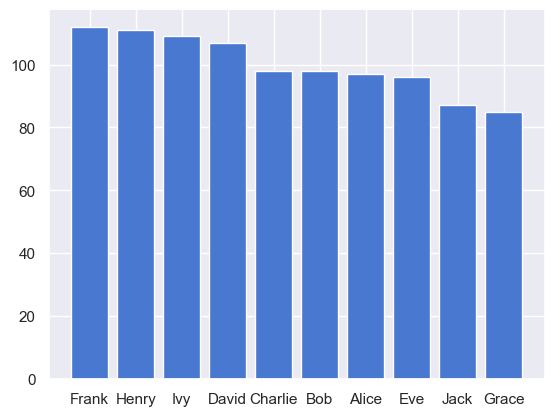

8
Jack       116
Eve        114
Ivy        110
David       97
Charlie     97
Henry       96
Bob         96
Grace       93
Frank       91
Alice       90
Name: count, dtype: int64


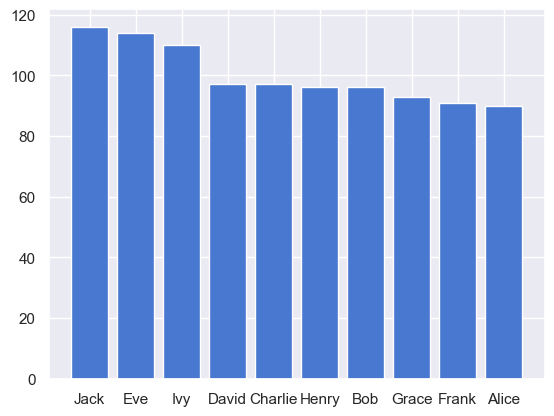

In [10]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


1
 1.162717    1
-2.800894    1
 0.683642    1
-0.797515    1
 0.175395    1
            ..
 0.987638    1
-2.073400    1
 0.766043    1
 0.861198    1
 0.180831    1
Name: count, Length: 1000, dtype: int64
2
-0.533602    1
-0.538819    1
 1.058653    1
-0.739618    1
-0.368290    1
            ..
 0.305582    1
 0.650682    1
-0.483982    1
-0.375815    1
-0.832630    1
Name: count, Length: 1000, dtype: int64
3
-0.628703    1
 0.072923    1
-0.674491    1
-0.142296    1
-0.020361    1
            ..
 1.068018    1
-0.825995    1
-0.291956    1
-1.576035    1
 0.264601    1
Name: count, Length: 1000, dtype: int64
6
 0.344324    1
 1.405697    1
-0.340002    1
 0.095517    1
-0.992499    1
            ..
-1.188589    1
-0.179245    1
 1.752756    1
-0.025580    1
-1.077682    1
Name: count, Length: 1000, dtype: int64
9
-0.475478    1
-0.350641    1
 0.265358    1
 0.375385    1
 0.046493    1
            ..
 0.283911    1
 1.295265    1
-1.106879    1
 0.070702    1
 1.205578    1
Name:

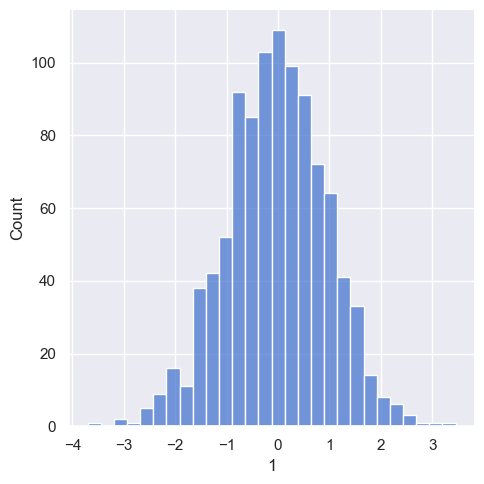

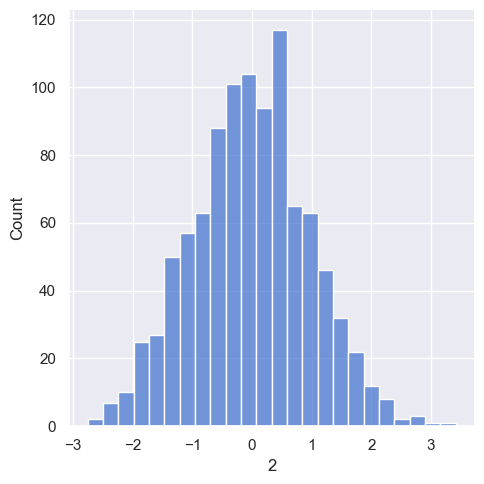

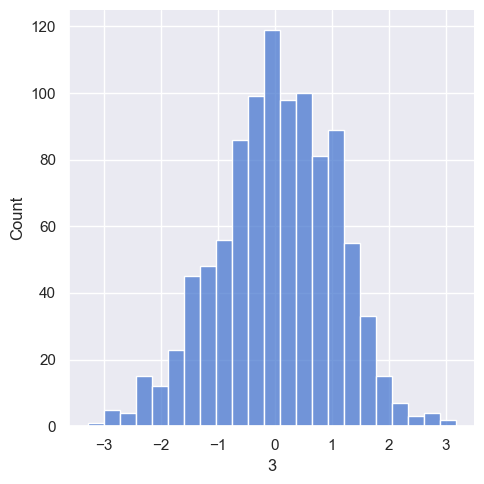

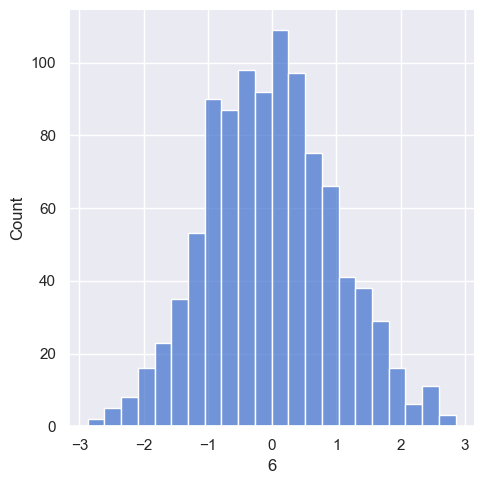

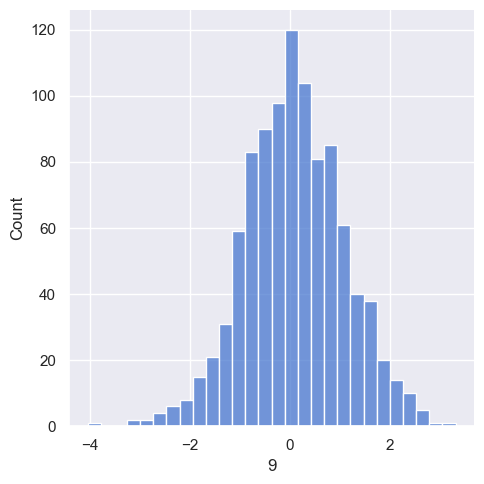

In [11]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])


# Regression

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for 

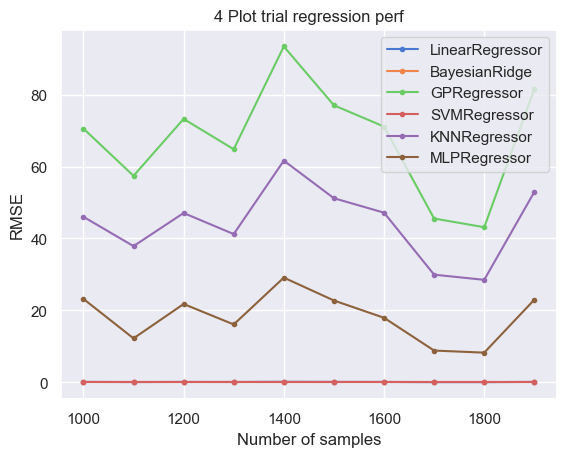

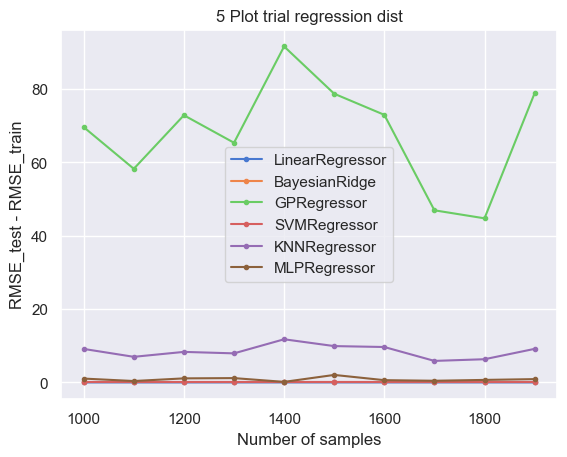

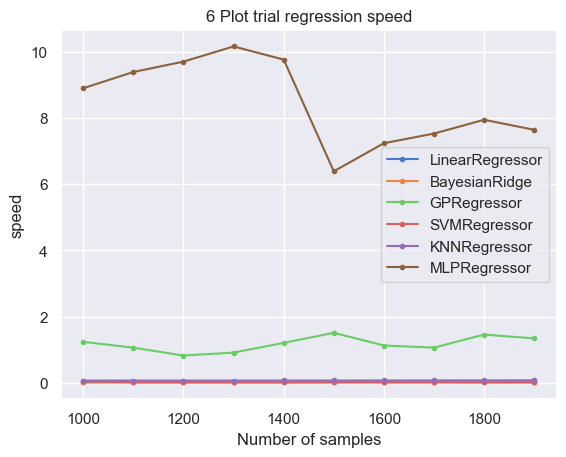

In [12]:
from SCRIPTS.D_data_analysis import regression
from SCRIPTS.E_plot_results import plot

# REGRESSION EXAMPLE
    # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
    # and I generated the three plots for the evaluation of the results)
results_for_each_algorithm = []
REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
SEED = 2023
for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION
        X, y = make_dataset_for_regression(n_samples=1000+i*10, n_features=10, n_informative=3, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
        # DATA POLLUTION
        df = pd.DataFrame(X)
        polluted_dataset = inject_variable_type_issue(df, 0.3)
        # DATA ANALYSIS
        results_1_analysis = regression(df, y, algorithm, SEED)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
# EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
x_axis_values = [1000 + i * 10 for i in range(10)]
print(x_axis_values)

plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="4 Plot trial regression perf", algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="5 Plot trial regression dist", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="6 Plot trial regression speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed")
